# **Aula 8 - Análise e visualização de dados com Python - biblioteca pandas (Parte 4)**

**PYTHON PARA ECÓLOGOS (E OUTROS BIOLOGOS TAMBEM)**

## **Link de Estudo** 
- https://blog.matheusyuri.pro/aula-8-analise-e-visualizacao-de-dados-com-python-biblioteca-pandas-parte-4

In [2]:
import pandas as pd #Importa o pandas
import matplotlib.pyplot as plt #Importa a API do Matplotlib
%matplotlib inline # Define que os resultados/plots obtidos com o Matplotlib sejam apresentados e armazenados junto do notebook com o qual estamos trabalhando

UsageError: unrecognized arguments: # Define que os resultados/plots obtidos com o Matplotlib sejam apresentados e armazenados junto do notebook com o qual estamos trabalhando


In [3]:
df = pd.read_csv("https://github.com/mhalmenschlager/python-biologia/raw/main/archives/surveys.csv")
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


<AxesSubplot:>

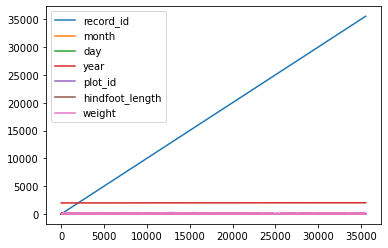

In [4]:
df.plot()

<AxesSubplot:xlabel='year'>

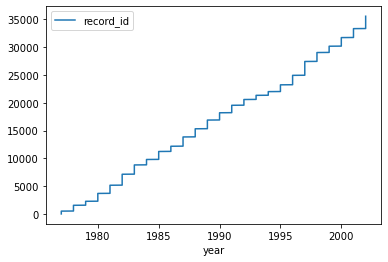

In [5]:
df.plot(x='year', y='record_id') #Especifica os valores dos eixos 'x' e 'y'

In [6]:
year = df.groupby('year')['record_id'].count() #Contagem de amostragens, com base em seus IDs, por ano
year.head() #Cinco primeiras entradas do frame

year
1977     503
1978    1048
1979     719
1980    1415
1981    1472
Name: record_id, dtype: int64

<AxesSubplot:xlabel='year'>

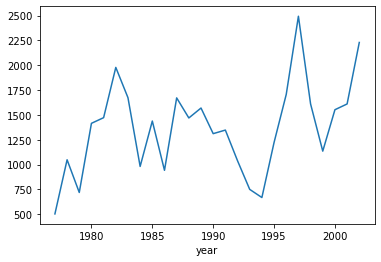

In [7]:
year.plot() #Gráfico de linha do objeto 'year'

<AxesSubplot:xlabel='year'>

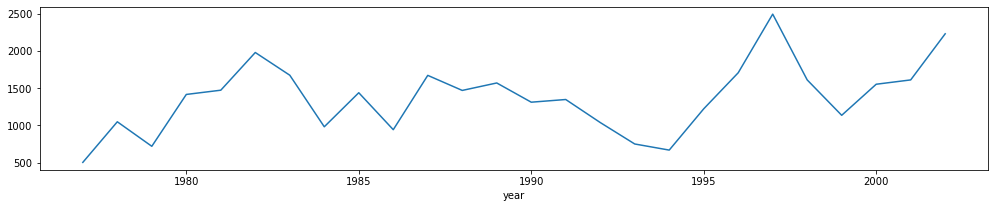

In [8]:
year.plot(figsize=(17,3)) #Gráfico de linha do objeto 'year', com tamanho de figura (17,3)

In [9]:
count = df.groupby('species_id')['record_id'].count() #Contagem dos IDs das amostragens de acordo com os IDs de espécies
count.head() #As cinco primeiras entradas do objeto 'count'

species_id
AB    303
AH    437
AS      2
BA     46
CB     50
Name: record_id, dtype: int64

<AxesSubplot:xlabel='species_id'>

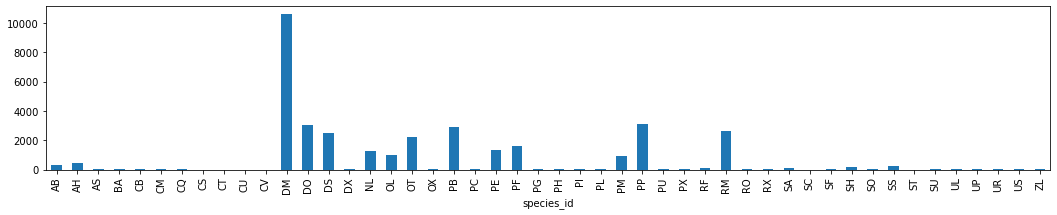

In [10]:
count.plot(kind='bar', figsize=(18,3)) #Plotagem de um gráfico de barras do objeto 'count', com tamanho (18, 3)

In [11]:
count2 = df.groupby('species_id')['record_id'].count().sort_values(ascending = False) #Contagem dos IDs das amostragens de acordo com os IDs de espécies, de forma ordenada. O (ascending = False) indica que a organização será feita de forma decrescente, do maior para o menor.
count2.head() #As cinco primeiras entradas do objeto 'count2'

species_id
DM    10596
PP     3123
DO     3027
PB     2891
RM     2609
Name: record_id, dtype: int64

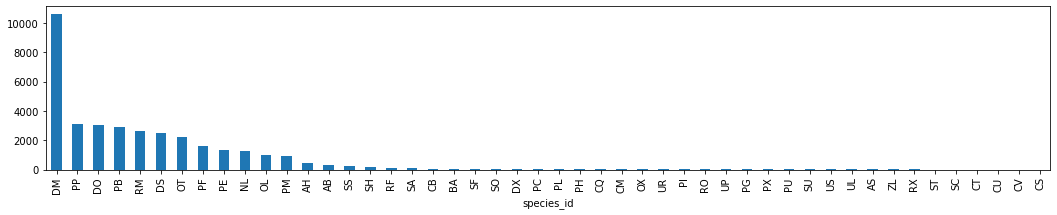

In [12]:
count2.plot(kind='bar', figsize=(18,3)); #Plotagem de um gráfico de barras do objeto 'count2', com tamanho (18, 3)

In [13]:
dmXdoXpp = df.groupby('species_id')['record_id'].count()[['DO', 'DM', 'PP']] #Contagem da amostragem das espécies 'DM', 'DO', e 'PP', considerando seus IDs de registro
dmXdoXpp #Chamamento do objeto 'dmXdoXpp'

species_id
DO     3027
DM    10596
PP     3123
Name: record_id, dtype: int64

<AxesSubplot:ylabel='record_id'>

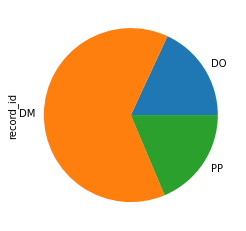

In [14]:
dmXdoXpp.plot(kind='pie') #Plotagem de um gráfico de pizza do objeto 'dmXdoXpp'

In [15]:
MxF = df.pivot_table('hindfoot_length', 'record_id', 'sex') #Tabela com a variação do comprimento do retropé de acordo com o sexo das amostras consideradas no conjunto de dados
MxF

sex,F,M
record_id,,
1,NaN,32.0
2,NaN,33.0
3,37.0,NaN
4,NaN,36.0
5,NaN,35.0
...,...,...
35541,24.0,NaN
35542,26.0,NaN
35543,27.0,NaN


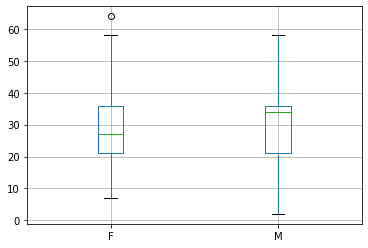

In [16]:
MxF.boxplot(); #Gráfico de caixa do objeto 'MxF'

<AxesSubplot:>

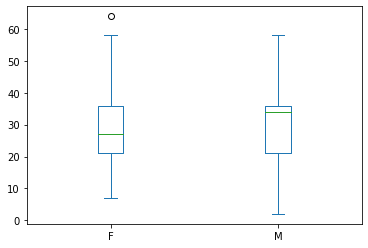

In [17]:
MxF.plot(kind = 'box') #Gráfico de caixa do objeto 'MxF'